# TMDb Movie Trend Analysis

Case Study: Exploring the TMDb Movie Dataset: Analytical Research

# Research Question

1. What is the most popular movie genre for each year?
2. Which year has the highest release of movies?
3. What are the Top 10 Movies based on Revenue generated?
4. what are the Top 10 Movies with the highest budget?
5. What movie genre has the highest movie release?
6. Which movies are the longest and shortest based on runtime?
7. What are the most popular genres in different decades?
8. Are there any correlations between movie ratings and runtime?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the csv file into a pandas dataframe.
movies = pd.read_csv("tmdb-movies.csv")

In [3]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#print concise summary of the dataset
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#count total rows in each column which contain null values
movies.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
#Check for any duplicated rows.
movies.duplicated().sum()

1

In [8]:
#drop the duplicate row.
movies.drop_duplicates(inplace = True)

In [9]:
#the the given release date is in a string format but needs to be in a datetime format

movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [10]:
movies.drop(['id', 'imdb_id', 'cast','homepage', 'tagline', 'keywords', 'overview', 
         'production_companies', 'revenue_adj','budget_adj'], axis = 1, inplace = True)

In [11]:
movies.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


In [12]:
# Split the 'genres' column by '|'
movies['genres'] = movies['genres'].str.split('|')

# Get the first genre from the split list
movies['genres'] = movies['genres'].str.get(0)

# Rename the 'genres' column to 'genre'
movies = movies.rename(columns={'genres': 'genre'})

In [13]:
movies.head()

,popularity,budget,revenue,original_title,director,runtime,genre,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action,2015-04-01,2947,7.3,2015


## Exploratory Data Analysis(EDA)

## 1. What is the most popular movie genre for each year?

In [47]:
# Group by 'year' and 'genre', count the occurrences of each genre for each year
genre_counts = movies.groupby(['release_year', 'genre']).size().reset_index(name='count')

# the most popular genre for each year
most_popular_genre = genre_counts.loc[genre_counts.groupby('release_year')['count'].idxmax()]

# Print the result
print(most_popular_genre)

     release_year   genre  count
0            1960  Action      8
9            1961  Comedy      8
21           1962   Drama     11
30           1963  Comedy      9
38           1964  Comedy     10
51           1965   Drama     11
55           1966  Action     11
72           1967  Comedy     11
88           1968   Drama     10
99           1969   Drama      8
105          1970  Action     10
126          1971   Drama     15
137          1972  Comedy     11
145          1973  Action     13
158          1974  Action     11
169          1975  Action      8
188          1976   Drama     11
199          1977   Drama     14
213          1978   Drama     17
224          1979   Drama     17
231          1980  Action     20
252          1981   Drama     16
264          1982  Comedy     21
278          1983  Comedy     23
297          1984   Drama     23
310          1985  Comedy     31
324          1986  Comedy     26
337          1987  Comedy     34
353          1988  Comedy     42
368       

## 2.Which year has the highest release of movies?

In [15]:
# Group by 'release year' and the number of movies in each year
yearly_movie_counts = movies.groupby('release_year').size()

# the year with the highest number of movie releases
highest_release_year = yearly_movie_counts.idxmax()

print("Year with the highest number of movie releases:", highest_release_year)
print("Number of movie releases in the highest year:", yearly_movie_counts.max())

Year with the highest number of movie releases: 2014
Number of movie releases in the highest year: 700


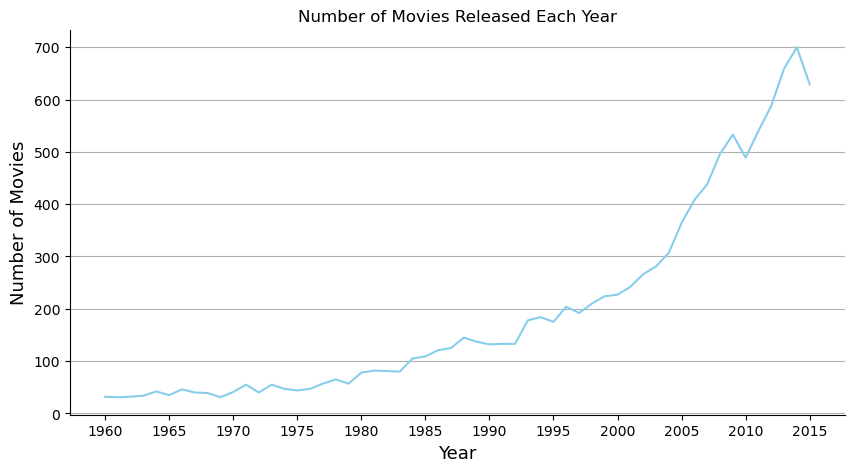

In [16]:
# Group by 'year' and count the number of movies in each year
yearly_movie_counts = movies.groupby('release_year').size()

# Plotting the graph
plt.figure(figsize=(10, 5))  
plt.plot(yearly_movie_counts.index, yearly_movie_counts.values, color='skyblue')
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Number of Movies', fontsize = 13)
plt.title('Number of Movies Released Each Year')
plt.xticks(range(min(yearly_movie_counts.index), max(yearly_movie_counts.index) + 1, 5)) 
plt.grid(axis='y') 
sns.despine()
plt.show()

## 3. What are the Top 10 Movies based on Revenue generated

In [21]:
# Sort the DataFrame by 'revenue' in descending order
top_10_movies = movies.sort_values(by='revenue', ascending=False)

# Print the top 10 movies based on revenue
top_10_movies.head(10)

,popularity,budget,revenue,original_title,director,runtime,genre,release_date,vote_count,vote_average,release_year
1386,9.432768,237000000,2781505847,Avatar,James Cameron,162,Action,2009-12-10,8458,7.1,2009
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action,2015-12-15,5292,7.5,2015
5231,4.355219,200000000,1845034188,Titanic,James Cameron,194,Drama,1997-11-18,4654,7.3,1997
4361,7.637767,220000000,1519557910,The Avengers,Joss Whedon,143,Science Fiction,2012-04-25,8903,7.3,2012
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action,2015-04-01,2947,7.3,2015
14,5.944927,280000000,1405035767,Avengers: Age of Ultron,Joss Whedon,141,Action,2015-04-22,4304,7.4,2015
3374,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,David Yates,130,Adventure,2011-07-07,3750,7.7,2011
5422,6.112766,150000000,1274219009,Frozen,Chris Buck|Jennifer Lee,102,Animation,2013-11-27,3369,7.5,2013
5425,4.946136,200000000,1215439994,Iron Man 3,Shane Black,130,Action,2013-04-18,6882,6.9,2013


## 4. What are the Top 10 Movies with the highest budget ?

In [20]:
# Sort the DataFrame by budget in descending order
Costly_movies = movies.sort_values(by='budget', ascending=False)

# Print the top 10 movies based on budget
Costly_movies.head(10)

,popularity,budget,revenue,original_title,director,runtime,genre,release_date,vote_count,vote_average,release_year
2244,0.250540,425000000,11087569,The Warrior's Way,Sngmoo Lee,100,Adventure,2010-12-02,74,6.4,2010
3375,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Rob Marshall,136,Adventure,2011-05-11,3180,6.3,2011
7387,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,Gore Verbinski,169,Adventure,2007-05-19,2626,6.8,2007
14,5.944927,280000000,1405035767,Avengers: Age of Ultron,Joss Whedon,141,Action,2015-04-22,4304,7.4,2015
6570,1.957331,270000000,391081192,Superman Returns,Bryan Singer,154,Adventure,2006-06-28,834,5.3,2006
4411,1.588457,260000000,284139100,John Carter,Andrew Stanton,132,Action,2012-03-07,1479,6.0,2012
1929,2.865684,260000000,591794936,Tangled,Nathan Greno|Byron Howard,100,Animation,2010-11-24,2019,7.3,2010
7394,2.520912,258000000,890871626,Spider-Man 3,Sam Raimi,139,Fantasy,2007-05-01,2083,5.8,2007
5508,1.214510,255000000,89289910,The Lone Ranger,Gore Verbinski,149,Action,2013-07-03,1607,6.0,2013
4367,4.218933,250000000,1017003568,The Hobbit: An Unexpected Journey,Peter Jackson,169,Adventure,2012-11-26,6417,6.9,2012


## 5. What movie genre has the highest movie release?

In [27]:
total_genre = movies['genre'].value_counts()

# Display the result
total_genre.head(10)

Drama          2453
Comedy         2319
Action         1590
Horror          915
Adventure       586
Thriller        491
Documentary     432
Animation       403
Crime           380
Fantasy         272
Name: genre, dtype: int64

In [28]:
total_genre.tail(10)

Science Fiction    214
Romance            186
Family             144
Mystery            125
Music              100
TV Movie            78
War                 59
History             44
Western             42
Foreign              9
Name: genre, dtype: int64

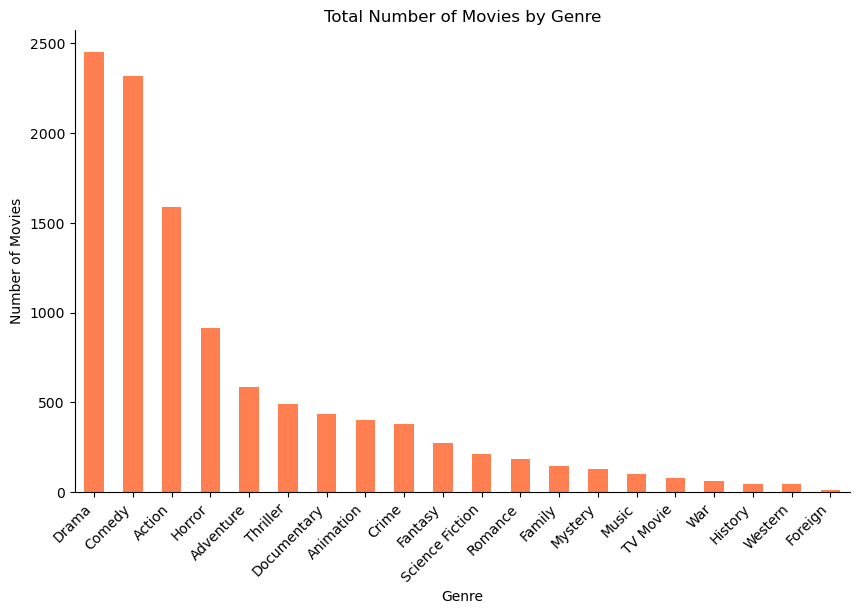

In [30]:
plt.figure(figsize=(10, 6))  
total_genre.plot(kind='bar', color='coral')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Total Number of Movies by Genre')
plt.xticks(rotation=45, ha='right') 
sns.despine()
plt.show()

## 6. Which movies are the longest and shortest based on runtime?

In [35]:
# the longest and shortest movies based on runtime
longest_movie = movies.loc[movies['runtime'].idxmax()]
shortest_movie = movies.loc[movies['runtime'].idxmin()]

# a DataFrame to display the results in a tabular form
res = pd.DataFrame({'Longest Movie Title': [longest_movie['original_title']],
                          'Longest Movie Duration': [longest_movie['runtime']],
                          'Shortest Movie Title': [shortest_movie['original_title']],
                          'Shortest Movie Duration': [shortest_movie['runtime']]})

print("Longest and Shortest Movies:")
res

Longest and Shortest Movies:


,Longest Movie Title,Longest Movie Duration,Shortest Movie Title,Shortest Movie Duration
0,The Story of Film: An Odyssey,900,Mythica: The Necromancer,0


## 7. What are the most popular genres in different decades?

In [43]:
# Group release years into decades
movies['decade'] = (movies['release_year'] // 10) * 10

genre_counts = movies.groupby(['decade', 'genre']).size().reset_index(name='count')

# the most popular genres in each decade
most_popular_genres = genre_counts.loc[genre_counts.groupby('decade')['count'].idxmax()]

print("Most Popular Genres in Different Decades:")
print(most_popular_genres)

Most Popular Genres in Different Decades:
     decade   genre  count
6      1960   Drama     78
24     1970   Drama    109
40     1980  Comedy    258
60     1990  Comedy    437
80     2000  Comedy    871
103    2010   Drama    823


## 8. Are there any correlations between movie ratings and runtime?

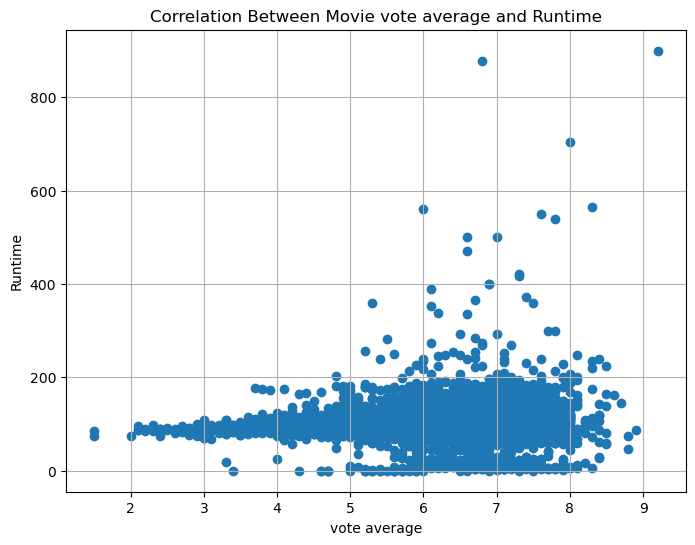

Correlation Coefficient Between vote average and Runtime: 0.15681296943304426


In [48]:
# Scatter plot of ratings vs runtime
plt.figure(figsize=(8, 6))
plt.scatter(movies['vote_average'], movies['runtime'], marker='o')
plt.xlabel('vote average')
plt.ylabel('Runtime')
plt.title('Correlation Between Movie vote average and Runtime')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
correlation_coefficient = movies['vote_average'].corr(movies['runtime'])
print("Correlation Coefficient Between vote average and Runtime:", correlation_coefficient)